In [1]:
import cv2
import numpy as np
from PIL import Image
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

<b> Xác định viền ảnh bằng 3 thuật toán chính: </b>
- Sử dụng Sobel Operator:
    - Sử dụng thư viện cv2
    - Xây dựng thuật toán dựa trên lý thuyết đã học
- Sử dụng Laplace of Gaussian:
    - Sử dụng thư viện cv2
    - Xây dựng thuật toán dựa trên lý thuyết đã học
- Sử dụng Canny method:
    - Sử dụng thư viện cv2
    - Xây dựng thuật toán dựa trên lý thuyết đã học

<b> Sử dụng Sobel Operator </b>

<b> - Sử dụng thư viện cv2: </b>

In [2]:
def edge_detection(image_path):
    # Read the image
    img_origin = Image.open(image_path)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply GaussianBlur to reduce noise and improve edge detection
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)

    # Use the Sobel operator to compute gradients in the x and y directions
    sobel_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)

    # Combine the gradients to get the overall gradient magnitude
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Convert the gradient magnitude to uint8 for display
    gradient_magnitude = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))

    # Display the original and edge-detected images
    plt.figure(figsize=(9, 6))
    plt.subplot(1, 2, 1), plt.title('Original Image'), plt.imshow(img_origin), plt.axis('off')
    plt.subplot(1, 2, 2), plt.title('Edge Detection (Sobel Operator)'), plt.imshow(gradient_magnitude, cmap='gray'), plt.axis('off')
    plt.show()

<b><i> Kiểm tra: </i></b>

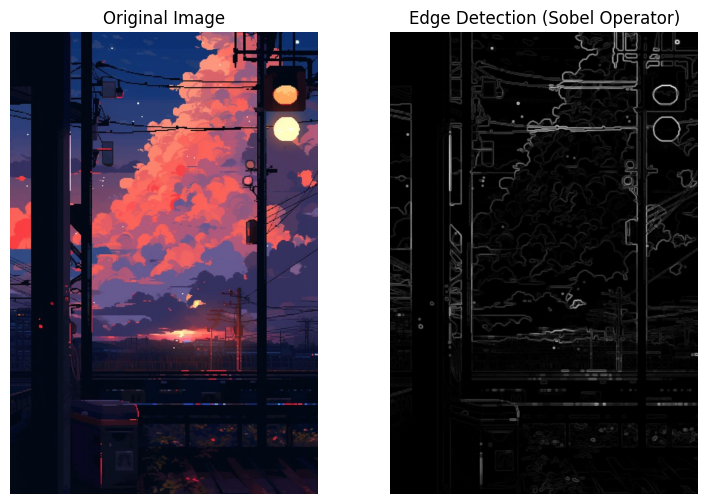

In [3]:
image_path = 'PixelParadise.jpg'
edge_detection(image_path) #for testing with library

<b> - Xây dựng thuật toán từ lý thuyết đã học: </b>

In [4]:
def sobel_operator(image):
    # Convert image to float64
    image = image.astype(np.float64)

    # Define the Sobel operator kernels
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Convolve the image with the Sobel kernels
    gradient_x = np.abs(convolve(image, kernel_x))
    gradient_y = np.abs(convolve(image, kernel_y))

    # Compute the gradient magnitude
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Normalize the gradient magnitude to the range [0, 255]
    gradient_magnitude = ((gradient_magnitude - np.min(gradient_magnitude)) /
                          (np.max(gradient_magnitude) - np.min(gradient_magnitude)) * 255).astype(np.uint8)

    return gradient_magnitude

<b><i> Kiểm tra: </i></b>

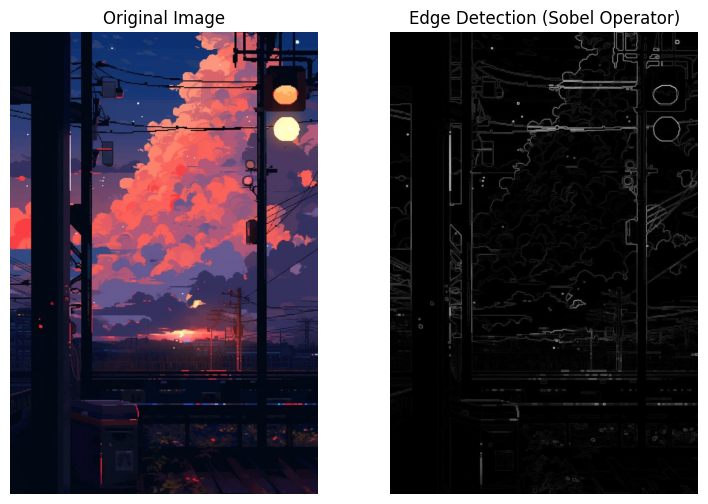

In [5]:
image_path = 'PixelParadise.jpg'
img_pil = Image.open(image_path).convert('L')  # Convert to grayscale
img_origin = Image.open(image_path)
# Convert PIL image to NumPy array
img_np = np.array(img_pil)

# Apply Sobel operator for edge detection
edge_result = sobel_operator(img_np)

# Display the original and edge-detected images using matplotlib
plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1), plt.title('Original Image'), plt.imshow(img_origin), plt.axis('off')
plt.subplot(1, 2, 2), plt.title('Edge Detection (Sobel Operator)'), plt.imshow(edge_result, cmap='gray'), plt.axis('off')
plt.show()

<b> Sử dụng Laplace of Gaussian: </b>

<b> - Sử dụng thư viện cv2: </b>

In [6]:
def laplace_of_gaussian_edge_detection(image, sigma):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian smoothing
    blurred_image = cv2.GaussianBlur(gray_image, (0, 0), sigma)

    # Apply Laplacian filter
    laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

    # Convert the result to uint8
    edges = np.uint8(np.absolute(laplacian))

    return edges

<b><i> Kiểm tra: </i></b>

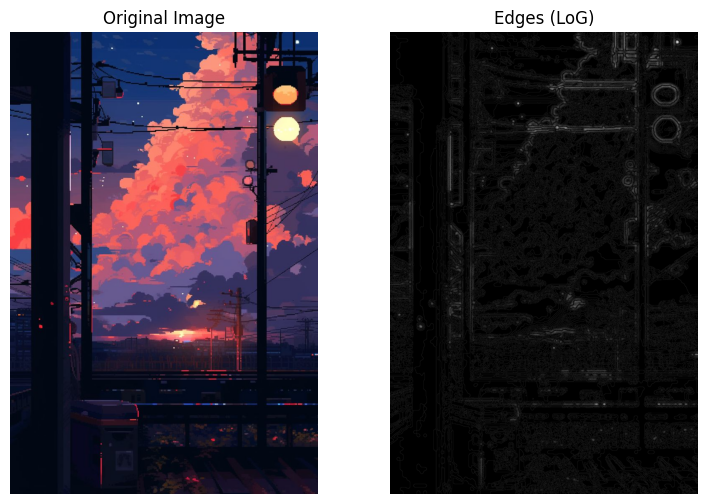

In [8]:
image_path = 'PixelParadise.jpg'
img_origin = Image.open(image_path)
input_image = cv2.imread(image_path)

# Set the value of sigma for Gaussian smoothing
sigma_value = 2.5

# Apply Laplace of Gaussian edge detection
edges_result = laplace_of_gaussian_edge_detection(input_image, sigma_value)
# Display the original and edge-detected images
plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1), plt.imshow(img_origin), plt.title('Original Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(edges_result, cmap='gray'), plt.title('Edges (LoG)'), plt.axis('off')
plt.show()

<b> - Xây dựng thuật toán từ lý thuyết đã học: </b>

In [9]:
def gaussian_filter(size, sigma):
    """
    Generate a 2D Gaussian filter.
    """
    ax = np.arange(-size // 2 + 1., size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

def laplace_of_gaussian(image, sigma):
    """Apply Laplace of Gaussian edge detection."""
    # Generate a Gaussian kernel
    size = int(6 * sigma)
    if size % 2 == 0:
        size += 1
    log_filter = gaussian_filter(size, sigma)
    log_filter = np.gradient(np.gradient(log_filter, axis=0), axis=0) + np.gradient(np.gradient(log_filter, axis=1), axis=1)

    # Convolve the image with the LoG filter
    filtered_image = convolve(image, log_filter, mode='constant', cval=0)

    return filtered_image

# def zero_crossing(image):
#     """
#     Perform zero-crossing detection on the filtered image.
#     """
#     rows, cols = image.shape
#     result = np.zeros_like(image, dtype=np.uint8)

#     for i in range(1, rows - 1):
#         for j in range(1, cols - 1):
#             neighbors = [image[i-1, j-1], image[i-1, j], image[i-1, j+1],
#                          image[i, j-1], image[i, j], image[i, j+1],
#                          image[i+1, j-1], image[i+1, j], image[i+1, j+1]]
#             if any(n < 0 and min(neighbors) >= 0 or n > 0 and max(neighbors) <= 0 for n in neighbors):
#                 result[i, j] = 255

#     return result


<b><i> Kiểm tra: </i></b>

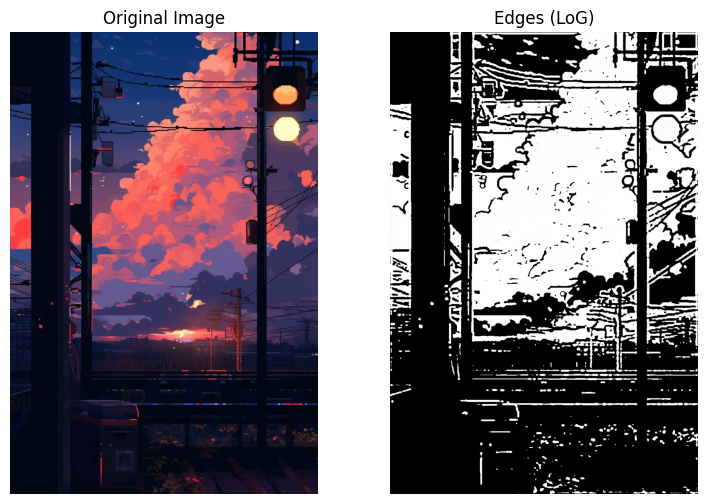

In [11]:
# Load the image from file
image_path = 'PixelParadise.jpg'
img_origin = Image.open(image_path)
input_image = np.array(Image.open(image_path).convert('L'))  # Convert to grayscale

# Apply Laplace of Gaussian
sigma_value = 2.5
filtered_image = laplace_of_gaussian(input_image, sigma_value)
# Display the original and edge-detected images
plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1), plt.imshow(img_origin), plt.title('Original Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(filtered_image, cmap='gray'), plt.title('Edges (LoG)'), plt.axis('off')
plt.show()

<b> Sử dụng Canny method: </b>

<b> - Sử dụng thư viện cv2: </b>

In [12]:
def edge_detection_canny(image_path, low_threshold, high_threshold):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_origin = Image.open(image_path)
    # Apply Gaussian blur to the image to reduce noise and smoothen it
    blurred = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, low_threshold, high_threshold)
    
    plt.figure(figsize=(9, 6))
    plt.subplot(121), plt.imshow(img_origin), plt.title('Original Image'), plt.axis('off')
    plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Canny Method'), plt.axis('off')
    plt.show()

<b><i> Kiểm tra: </i></b>

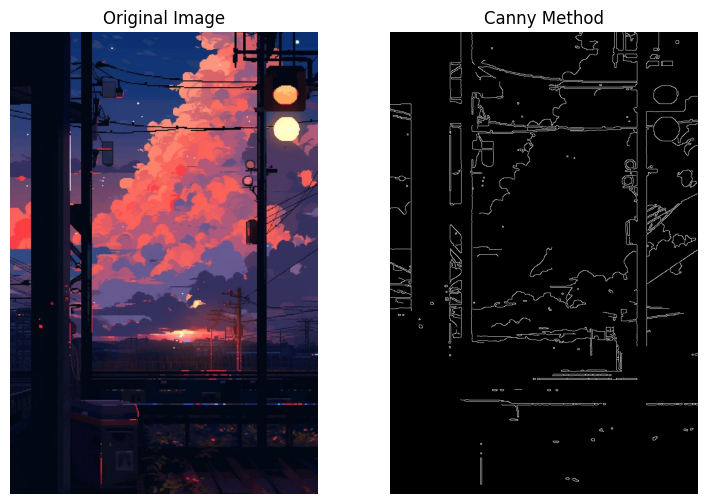

In [13]:
image_path = 'PixelParadise.jpg' 
low_threshold = 50
high_threshold = 150
edge_detection_canny(image_path, low_threshold, high_threshold)

<b> - Sử dụng thuật toán từ lý thuyết đã học: </b>

In [14]:
def gaussian_kernel(size, sigma):
    """Generate a Gaussian kernel."""
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-size//2)**2 + (y-size//2)**2)/(2*sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

def canny_edge_detection(image, low_threshold, high_threshold):
    # Convert the image to grayscale
    if len(image.shape) == 3:
        image = np.mean(image, axis=-1)

    # Apply Gaussian blur
    kernel_size = 5
    sigma = 1.4
    gaussian = gaussian_kernel(kernel_size, sigma)
    smoothed = convolve(image, gaussian, mode='constant', cval=0.0)

    # Compute gradients using Sobel filters
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    gradient_x = convolve(smoothed, sobel_x, mode='constant', cval=0.0)
    gradient_y = convolve(smoothed, sobel_y, mode='constant', cval=0.0)

    # Compute gradient magnitude and direction
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)

    # Non-maximum suppression
    suppressed = np.zeros_like(gradient_magnitude)

    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            angle = gradient_direction[i, j]
            q = 255
            r = 255

            if (0 <= angle < np.pi/8) or (7*np.pi/8 <= angle <= np.pi):
                q = gradient_magnitude[i, j+1]
                r = gradient_magnitude[i, j-1]
            elif (np.pi/8 <= angle < 3*np.pi/8) or (5*np.pi/8 <= angle < 7*np.pi/8):
                q = gradient_magnitude[i+1, j-1]
                r = gradient_magnitude[i-1, j+1]
            elif (3*np.pi/8 <= angle < 5*np.pi/8):
                q = gradient_magnitude[i+1, j]
                r = gradient_magnitude[i-1, j]

            if gradient_magnitude[i, j] >= q and gradient_magnitude[i, j] >= r:
                suppressed[i, j] = gradient_magnitude[i, j]

    # Hysteresis thresholding
    strong_edges = (suppressed > high_threshold)
    weak_edges = (suppressed >= low_threshold) & (suppressed <= high_threshold)

    # Edge tracking by hysteresis
    final_edges = np.zeros_like(image)
    final_edges[strong_edges] = 255

    for i in range(1, final_edges.shape[0] - 1):
        for j in range(1, final_edges.shape[1] - 1):
            if weak_edges[i, j]:
                if (np.any(strong_edges[i-1:i+2, j-1:j+2])):
                    final_edges[i, j] = 255

    return final_edges.astype(np.uint8)


<b><i> Kiểm tra: </i></b>

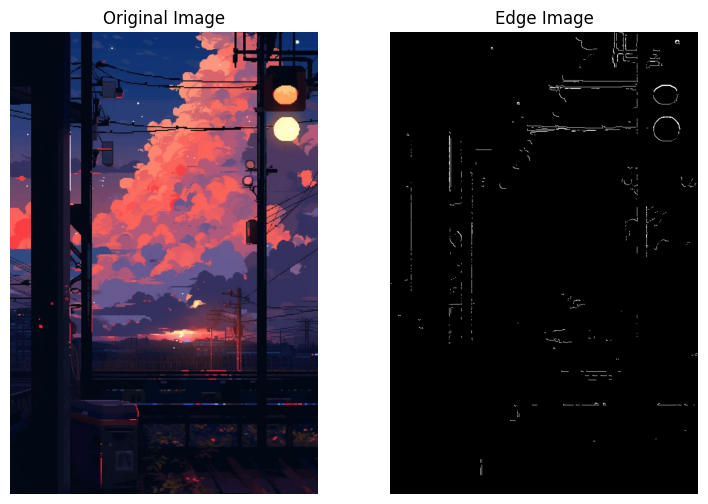

In [18]:
# Example usage
image = plt.imread('PixelParadise.jpg')
low_threshold = 50
high_threshold = 150
edges = canny_edge_detection(image, low_threshold, high_threshold)

# Display the original and edges images using matplotlib
plt.figure(figsize=(9, 6))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Edge Image'), plt.axis('off')
plt.show()